FunctionsGraph
==============

 `FunctionsGraph` is one of the core classes of FiatLight: it represents a graph of functions,
 where the output of one function can be linked to the input of another function.

 See its full code [online](../fiat_core/functions_graph.py).

Creating a FunctionsGraph
=========================

### When a FunctionsGraph can be created automatically

In simple cases (one function, or a list of functions that are chained together), you do not need to create a
FunctionsGraph. See the examples below.

*Single function*:

2024-06-17 01:46:02.584 Python[35327:28926272] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


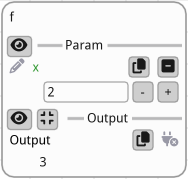

In [2]:
import fiatlight as fl
def f(x: int) -> int:
    return x + 1
fl.run(f, app_name="Single function")

*Chained functions*:

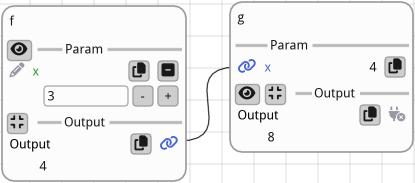

In [3]:
import fiatlight as fl
def f(x: int) -> int:
    return x + 1
def g(x: int) -> int:
    return x * 2
fl.run([f, g], app_name="Chained functions")

When you need to create a FunctionsGraph
----------------------------------------

For more complex cases, you can create a FunctionsGraph manually. This allows you to precisely control the links between
the functions.

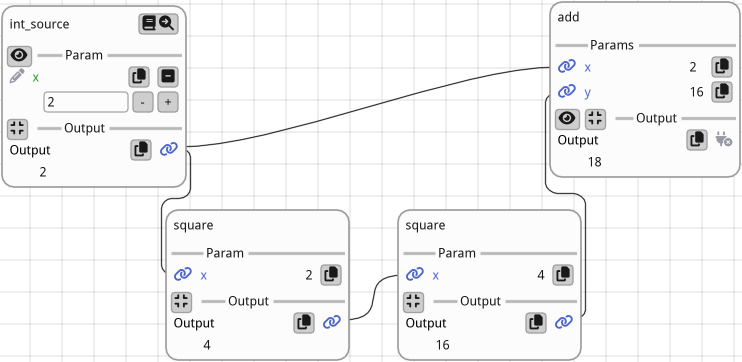

In [4]:
import fiatlight as fl

def int_source(x : int) -> int:
    """This function will be the entry point of the graph
    Since its inputs is unlinked, fiatlight will ask the user for a value for x
    """
    return x

def square(x: int) -> int:
    return x * x

def add(x: int, y: int) -> int:
    return x + y

# 1. Create the graph
#
#    Notes:
#      - in this example we add the function `square` *two times*!
#          Each of them will have a different *unique name*: "square_1" and "square_2"
#      - instead of creating a graph from a function composition, we could also create an empty graph
#        and add the functions manually, like show in the comment below:
#             graph = fl.FunctionsGraph.create_empty()
#             graph.add_function_composition([int_source, square, square])
#
graph = fl.FunctionsGraph.from_function_composition([int_source, square, square])


# 2. Manually add a function
graph.add_function(add)

# 3. And link it
# First, link the output of int_source to the "x" input of add
# Note: we could also specify the source output index: src_output_idx=0 (but this is the default)
graph.add_link("int_source", "add", dst_input_name="x")

# Then, link the output of the second `square` to the "y" input of add
graph.add_link("square_2", "add", dst_input_name="y")


# 4. Run the graph
fl.run(graph, app_name="Manual graph")

-------------------------------------------------------------------------------

FunctionsGraph signature
========================

Below, you will find the "signature" of the `FunctionsGraph` class,
with its main attributes and methods (but not their bodies)

Its full source code is [available online](../fiat_core/functions_graph.py).

In [5]:
from fiatlight.fiat_doc import look_at_code
%look_at_class_header fiatlight.fiat_core.FunctionsGraph

class FunctionsGraph:
    """A graph of FunctionNodes

     `FunctionsGraph` is one of the core classes of FiatLight: it represents a graph of functions,
     where the output of one function can be linked to the input of another function.

     See its [full code](../fiat_core/functions_graph.py).

    It contains a graph of FunctionNodes modeled as a list of FunctionNode and a list of FunctionNodeLink
    (which are the links between the outputs of a FunctionNode and the inputs of another FunctionNode)

    This class only stores the data representation of the graph, and does not deal with its GUI representation
    (for this, see FunctionGraphGui)

    This class is not meant to be instantiated directly. Use the factory methods instead.

    Public Members
    ==============
    # the list of FunctionNode in the graph
    functions_nodes: list[FunctionNode]
    # the list of links between the FunctionNode
    functions_nodes_links: list[FunctionNodeLink]

    """
    functions_nodes: list[FunctionNode]
    functions_nodes_links: list[FunctionNodeLink]
    _secret_key: str = 'FunctionsGraph'

    class _Construction_Section:
        """
        # ================================================================================================================
        #                                            Construction (Empty)
        # ================================================================================================================
        """
        pass

    def __init__(self, secret_key: str='FunctionsGraph') -> None:
        """This class should not be instantiated directly. Use the factory methods instead."""
        pass

    @staticmethod
    def create_empty() -> 'FunctionsGraph':
        """Create an empty FunctionsGraph"""
        pass

    class _Public_API_Add_Function_Section:
        """
        # ================================================================================================================
        #                                            Public API / Add functions
        #
        # ---------------------------------------------------------------------------------------------------------------
        # Notes:
        #   You can add either Functions or FunctionWithGui
        #     - If f is a FunctionWithGui, it will be added as is
        #     - If f is a standard function:
        #         - it will be wrapped in a FunctionWithGui
        #         - the function signature *must* mention the types of the parameters and the return type
        # ================================================================================================================
        """
        pass

    @staticmethod
    def from_function(f: Function | FunctionWithGui) -> 'FunctionsGraph':
        """Create a FunctionsGraph from a single function, either a standard function or a FunctionWithGui"""
        pass

    @staticmethod
    def from_function_composition(functions: Sequence[Function | FunctionWithGui]) -> 'FunctionsGraph':
        """Create a FunctionsGraph from a list of functions that will be chained together
        i.e. the output[0] of one function will be the input[0] of the next function
        """
        pass

    def add_function_composition(self, functions: Sequence[Function | FunctionWithGui]) -> None:
        """Add a list of functions that will be chained together"""
        pass

    def add_function(self, f: Function | FunctionWithGui) -> FunctionNode:
        """Add a function to the graph. It will not be linked to any other function. Returns the FunctionNode added."""
        pass

    class _Private_API_Add_Function_Section:
        """
        # ================================================================================================================
        #                                            Private API / Add functions
        # =============================================================================================================

Architecture
============

Below is a PlantUML diagram showing the architecture of the `fiat_core` module.
See the [architecture page](architecture) for the full architecture diagrams.

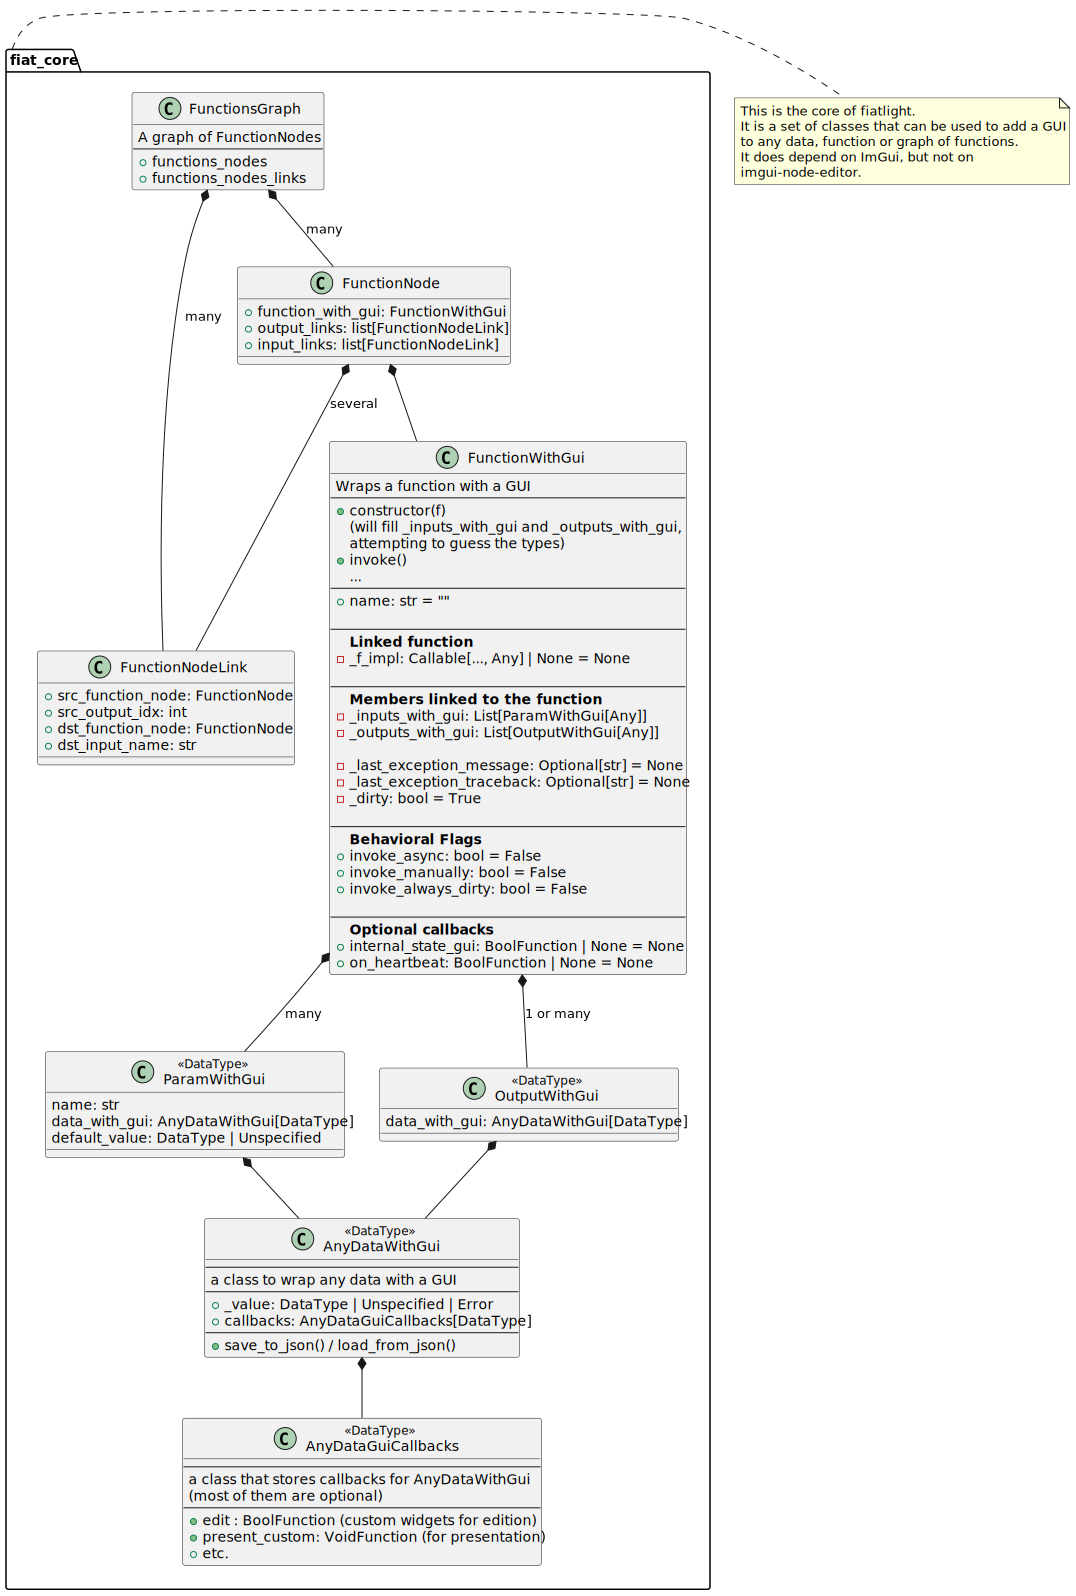

In [6]:
from fiatlight.fiat_doc import plantuml_magic
%plantuml_include class_diagrams/fiat_core.puml